In [19]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
import time

# Configure Chrome to automatically download PDFs
options = webdriver.ChromeOptions()
options.add_experimental_option('prefs', {
    'download.default_directory': r"D:\ML related things\NEET results analysis\neet_results_pdfs",
    'download.prompt_for_download': False,
    'plugins.always_open_pdf_externally': True
})

# Initialize WebDriver
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()), options=options)

# URL of the page with the PDFs
URL = "https://neet.ntaonline.in/frontend/web/common-scorecard/index"
driver.get(URL)
driver.maximize_window()
driver.implicitly_wait(5)  # Reduced implicit wait time

# Helper to find and download PDFs on the current page
def download_pdfs():
    links = driver.find_elements(By.XPATH, "//a[.//button[contains(text(), 'View Details')]]")
    print(f"Found {len(links)} PDF links on this page.")
    for link in links:
        pdf_url = link.get_attribute('href')
        if pdf_url and pdf_url.endswith('.pdf'):
            driver.get(pdf_url)  # Trigger download
            time.sleep(1)  # Shortened wait to optimize speed for faster internet

# Navigate through pages
while True:
    # Download PDFs on the current page
    download_pdfs()

    try:
        # Locate the "Next" button and click it
        next_button = driver.find_element(By.XPATH, "//a[@aria-controls='scorecardData' and contains(@class, 'page-link') and text()='Next']")
        if next_button.get_attribute('tabindex') == '0':  # Check if the button is enabled
            next_button.click()
            time.sleep(3)  # Shortened wait to optimize speed
        else:
            print("No more pages to process.")
            break
    except NoSuchElementException:
        print("Next button not found. Stopping.")
        break

print("All PDFs downloaded.")
driver.quit()


Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 P

Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 PDF links on this page.
Found 10 P

ElementClickInterceptedException: Message: element click intercepted: Element <a href="#" aria-controls="scorecardData" data-dt-idx="8" tabindex="0" class="page-link">...</a> is not clickable at point (1453, 696). Other element would receive the click: <li class="paginate_button page-item next disabled" id="scorecardData_next">...</li>
  (Session info: chrome=132.0.6834.110)
Stacktrace:
	GetHandleVerifier [0x00DD6FB3+25091]
	(No symbol) [0x00D5E5D4]
	(No symbol) [0x00C3B353]
	(No symbol) [0x00C85498]
	(No symbol) [0x00C838A4]
	(No symbol) [0x00C81447]
	(No symbol) [0x00C8075D]
	(No symbol) [0x00C75355]
	(No symbol) [0x00CA1EDC]
	(No symbol) [0x00C74DF4]
	(No symbol) [0x00CA2174]
	(No symbol) [0x00CBB46E]
	(No symbol) [0x00CA1C76]
	(No symbol) [0x00C73185]
	(No symbol) [0x00C7430D]
	GetHandleVerifier [0x010CD5B3+3131395]
	GetHandleVerifier [0x010DDDA4+3198964]
	GetHandleVerifier [0x010D8CC2+3178258]
	GetHandleVerifier [0x00E73290+664800]
	(No symbol) [0x00D6744D]
	(No symbol) [0x00D64798]
	(No symbol) [0x00D64936]
	(No symbol) [0x00D57030]
	BaseThreadInitThunk [0x75D15D49+25]
	RtlInitializeExceptionChain [0x77C0CEBB+107]
	RtlGetAppContainerNamedObjectPath [0x77C0CE41+561]


In [28]:
import os
import pdfplumber

# Path to PDFs and storage dictionary
pdf_folder = r"D:\ML related things\NEET results analysis\neet_results_pdfs"
results_data = {}
skipped_files = {"parentheses": [], "no_data": [], "errors": []}

# Process each PDF
for pdf_file in os.listdir(pdf_folder):
    # Skip duplicate copies like "example(1).pdf"
    if "(" in pdf_file:
        skipped_files["parentheses"].append(pdf_file)
        continue

    file_path = os.path.join(pdf_folder, pdf_file)
    center_code = os.path.splitext(pdf_file)[0]  # Use filename without extension as the key

    try:
        with pdfplumber.open(file_path) as pdf:
            pdf_data = []
            
            for page in pdf.pages:
                text = page.extract_text()
                
                # Parse Srlno and Marks from each line
                for line in text.split("\n"):
                    columns = line.split()
                    if len(columns) == 2 and columns[0].isdigit() and columns[1].isdigit():
                        pdf_data.append({"Srlno": int(columns[0]), "Marks": int(columns[1])})
            
            # Add to results only if data is extracted
            if pdf_data:
                results_data[center_code] = pdf_data
            else:
                skipped_files["no_data"].append(pdf_file)
    
    except Exception as e:
        skipped_files["errors"].append(pdf_file)
        print(f"Error processing {pdf_file}: {e}")

# Summary Report
total_pdfs = len(os.listdir(pdf_folder))
processed_pdfs = len(results_data)
skipped_parentheses = len(skipped_files["parentheses"])
skipped_no_data = len(skipped_files["no_data"])
skipped_errors = len(skipped_files["errors"])

print(f"Total PDFs: {total_pdfs}")
print(f"Number of successfully processed PDFs: {processed_pdfs}")
print(f"Number of PDFs skipped due to parentheses: {skipped_parentheses}")
print(f"Number of PDFs skipped due to no data: {skipped_no_data}")
print(f"Number of PDFs skipped due to errors: {skipped_errors}")

# Optional: Print skipped files for further analysis
print("\nSkipped due to parentheses:", skipped_files["parentheses"])
print("\nSkipped due to no data:", skipped_files["no_data"])
print("\nSkipped due to errors:", skipped_files["errors"])

# Example: Save the results_data for further analysis
import pandas as pd
result_df = pd.DataFrame.from_dict(results_data, orient="index")
result_df.to_csv(r"D:\ML related things\NEET results analysis\neet_results_summary.csv")


Total PDFs: 4750
Number of successfully processed PDFs: 901
Number of PDFs skipped due to parentheses: 36
Number of PDFs skipped due to no data: 3813
Number of PDFs skipped due to errors: 0

Skipped due to parentheses: ['120206 (1).pdf', '120207 (1).pdf', '120301 (1).pdf', '120302 (1).pdf', '120303 (1).pdf', '120304 (1).pdf', '120305 (1).pdf', '121001 (1).pdf', '121201 (1).pdf', '121202 (1).pdf', '121203 (1).pdf', '121204 (1).pdf', '121301 (1).pdf', '121401 (1).pdf', '121501 (1).pdf', '121502 (1).pdf', '121503 (1).pdf', '121601 (1).pdf', '121602 (1).pdf', '121603 (1).pdf', '121701 (1).pdf', '121801 (1).pdf', '121901 (1).pdf', '121902 (1).pdf', '121903 (1).pdf', '122001 (1).pdf', '122002 (1).pdf', '122003 (1).pdf', '122004 (1).pdf', '122005 (1).pdf', '122006 (1).pdf', '122007 (1).pdf', '122101 (1).pdf', '122102 (1).pdf', '122201 (1).pdf', '122202 (1).pdf']

Skipped due to no data: ['110101.pdf', '110102.pdf', '110103.pdf', '120101.pdf', '120102.pdf', '120103.pdf', '120104.pdf', '120105.

In [2]:
import re
import os
import pdfplumber

pdf_folder = r"D:\ML related things\NEET results analysis\neet_results_pdfs"
results_data = {}

for pdf_file in os.listdir(pdf_folder):
    if "(" in pdf_file:
        continue  # Skip duplicates

    file_path = os.path.join(pdf_folder, pdf_file)
    center_code = os.path.splitext(pdf_file)[0]

    try:
        with pdfplumber.open(file_path) as pdf:
            pdf_data = []
            for page in pdf.pages:
                text = page.extract_text()

                # Extract (Srlno, Marks) using regex
                matches = re.findall(r"(\d+)\s+(-?\d+)", text)
                for match in matches:
                    pdf_data.append({"Srlno": int(match[0]), "Marks": int(match[1])})

            if pdf_data:
                results_data[center_code] = pdf_data

    except Exception as e:
        print(f"Error processing {pdf_file}: {e}")

print(f"Total processed PDFs: {len(results_data)}")


Total processed PDFs: 4714


In [3]:
results_data["110101"]

[{'Srlno': 1, 'Marks': 46},
 {'Srlno': 31, 'Marks': 185},
 {'Srlno': 61, 'Marks': 111},
 {'Srlno': 91, 'Marks': 86},
 {'Srlno': 121, 'Marks': 84},
 {'Srlno': 151, 'Marks': 141},
 {'Srlno': 181, 'Marks': 69},
 {'Srlno': 211, 'Marks': 472},
 {'Srlno': 241, 'Marks': 79},
 {'Srlno': 271, 'Marks': 279},
 {'Srlno': 2, 'Marks': 226},
 {'Srlno': 32, 'Marks': 170},
 {'Srlno': 62, 'Marks': 238},
 {'Srlno': 92, 'Marks': 109},
 {'Srlno': 122, 'Marks': 87},
 {'Srlno': 152, 'Marks': 117},
 {'Srlno': 182, 'Marks': 421},
 {'Srlno': 212, 'Marks': 73},
 {'Srlno': 242, 'Marks': 365},
 {'Srlno': 272, 'Marks': 162},
 {'Srlno': 3, 'Marks': 449},
 {'Srlno': 33, 'Marks': 511},
 {'Srlno': 63, 'Marks': 372},
 {'Srlno': 93, 'Marks': 127},
 {'Srlno': 123, 'Marks': 167},
 {'Srlno': 153, 'Marks': 93},
 {'Srlno': 183, 'Marks': 91},
 {'Srlno': 213, 'Marks': 64},
 {'Srlno': 243, 'Marks': 40},
 {'Srlno': 273, 'Marks': 163},
 {'Srlno': 4, 'Marks': 424},
 {'Srlno': 34, 'Marks': 58},
 {'Srlno': 64, 'Marks': 219},
 {'Srlno

In [4]:
import pandas as pd

# Convert dictionary to DataFrame & sort Srlno within each center
df = pd.concat([
    pd.DataFrame(data).assign(Center=center) for center, data in results_data.items()
])
df = df.sort_values(by=["Center", "Srlno"])

# Create unique Center_Srlno ID
df["Center_Srlno"] = df["Center"] + "_" + df["Srlno"].astype(str)

# Flag suspicious scores
df["Full Marks (720)"] = df["Marks"] == 720
df["Near Full (719-715)"] = df["Marks"].between(715, 719)
df["Very High (700-714)"] = df["Marks"].between(700, 714)
df["High (650-699)"] = df["Marks"].between(650, 699)

# Group by center to detect suspicious centers
suspicious_centers = df.groupby("Center").agg(
    total_students=("Srlno", "count"),
    full_marks_students=("Full Marks (720)", "sum"),
    near_full_students=("Near Full (719-715)", "sum"),
    very_high_students=("Very High (700-714)", "sum"),
    high_students=("High (650-699)", "sum"),
)

# Flag centers with unusually high full/near-full marks
suspicious_centers["Full Marks %"] = (suspicious_centers["full_marks_students"] / suspicious_centers["total_students"]) * 100
suspicious_centers["Near Full %"] = (suspicious_centers["near_full_students"] / suspicious_centers["total_students"]) * 100
suspicious_centers["Very High %"] = (suspicious_centers["very_high_students"] / suspicious_centers["total_students"]) * 100
suspicious_centers["High %"] = (suspicious_centers["high_students"] / suspicious_centers["total_students"]) * 100

# Flag centers where 720, 719-715, or excessive 700+/650+ scores exist
fraudulent_centers = suspicious_centers[
    (suspicious_centers["Full Marks %"] > 0) |  # Any center with 720 scorers
    (suspicious_centers["Near Full %"] > 1) |   # Centers with 1%+ students scoring 719-715
    (suspicious_centers["Very High %"] > 1) |   # 5%+ students scoring 700-714
    (suspicious_centers["High %"] > 7)         # 10%+ students scoring 650-699
]

# Store results in DataFrame variables
df_results = df  # Full data
df_suspicious_centers = fraudulent_centers  # Flagged centers

print(f"Analysis complete. {len(df_suspicious_centers)} centers flagged as suspicious.")


Analysis complete. 104 centers flagged as suspicious.


In [5]:
df_suspicious_centers.describe()

,total_students,full_marks_students,near_full_students,very_high_students,high_students,Full Marks %,Near Full %,Very High %,High %
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,571.038462,0.586538,0.182692,2.086538,23.836538,0.105009,0.035243,0.378071,4.628480
std,251.405869,0.550562,0.477949,2.216928,17.856010,0.110423,0.088556,0.374622,3.235139
min,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.173611
25%,424.250000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,1.607102
50%,502.000000,1.000000,0.000000,2.000000,20.000000,0.106104,0.000000,0.281295,3.601954
75%,702.250000,1.000000,0.000000,3.000000,35.250000,0.187151,0.000000,0.548725,7.636854
max,1968.000000,2.000000,3.000000,12.000000,103.000000,0.436681,0.378788,1.767305,12.500000


In [40]:
df_suspicious_centers.drop("990401", inplace = True )

C:\Users\NITRO\AppData\Local\Temp\ipykernel_3040\3488759719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_suspicious_centers.drop("990401", inplace = True )


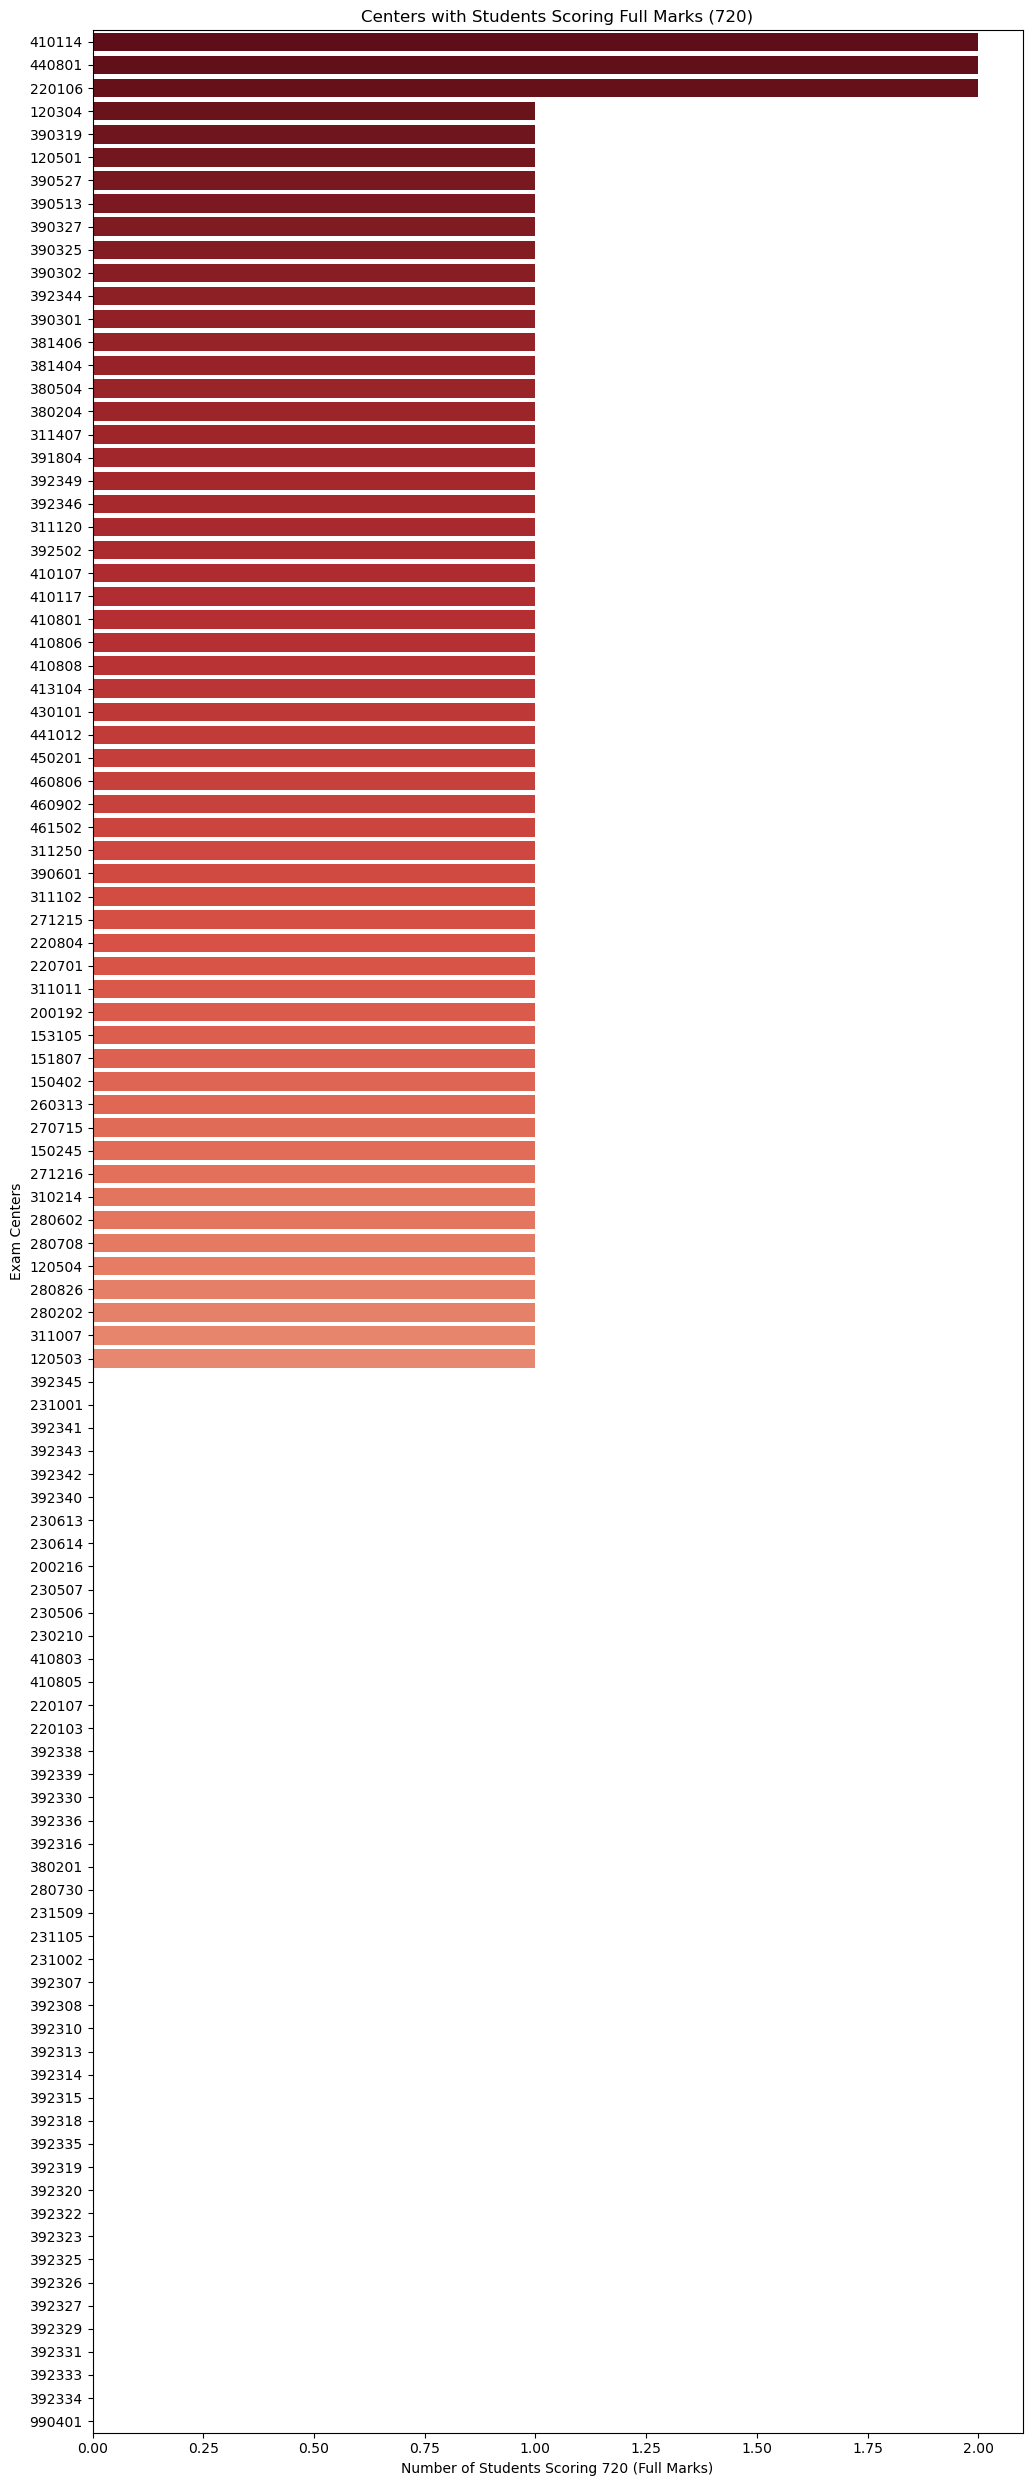

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort centers by the number of full marks students
full_marks_sorted = df_suspicious_centers.sort_values(by="full_marks_students", ascending=False)

# Bar Chart: Number of Full Marks Students per Center
plt.figure(figsize=(12, len(full_marks_sorted) * 0.3))  # Dynamic height based on center count
sns.barplot(
    x=full_marks_sorted["full_marks_students"],
    y=full_marks_sorted.index,
    palette="Reds_r"
)
plt.xlabel("Number of Students Scoring 720 (Full Marks)")
plt.ylabel("Exam Centers")
plt.title("Centers with Students Scoring Full Marks (720)")
plt.show()


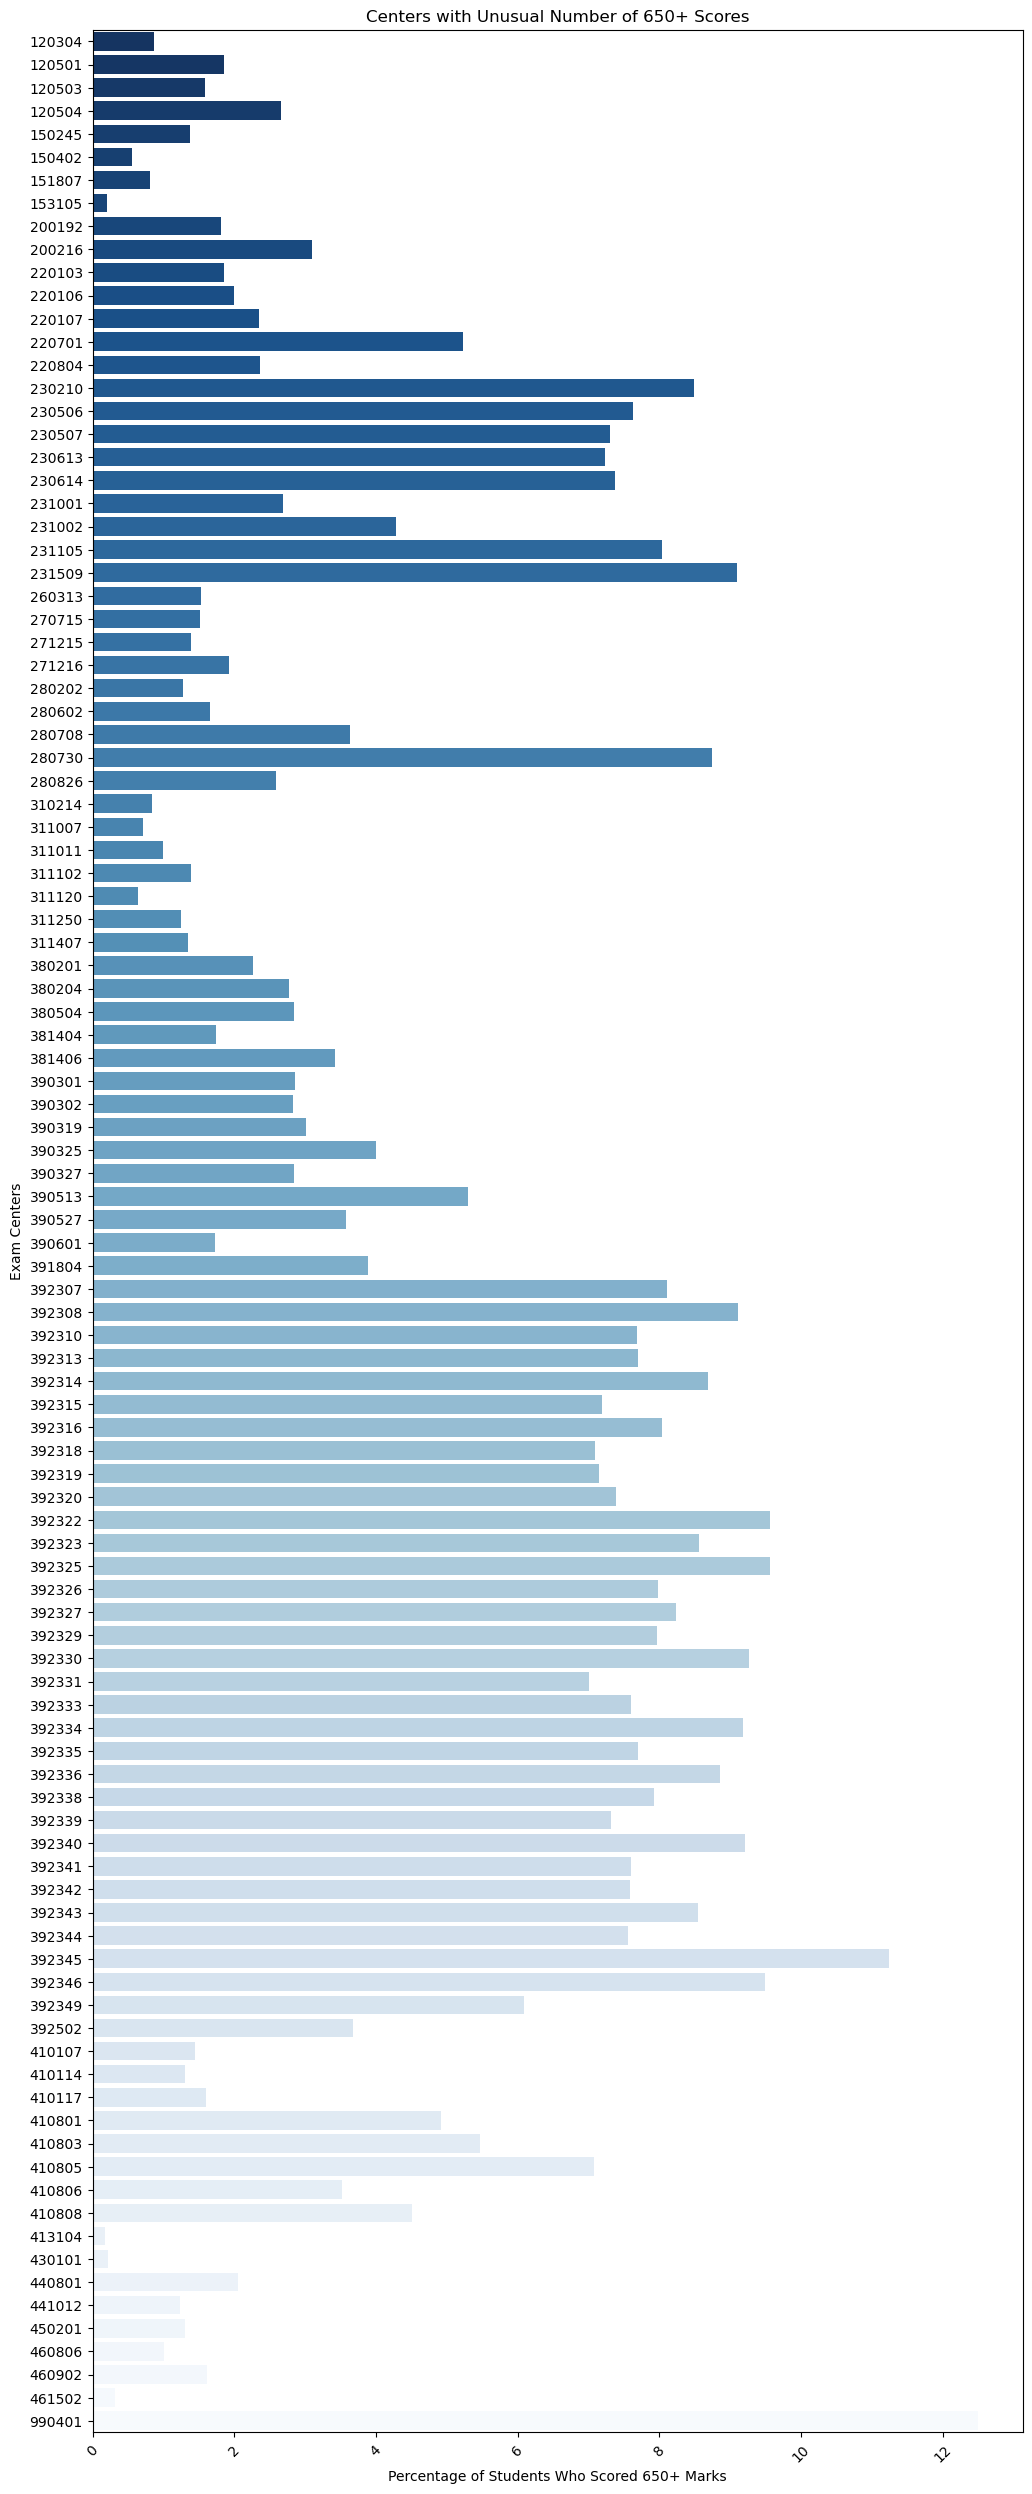

In [12]:
plt.figure(figsize=(12, len(df_suspicious_centers) * 0.3))
sns.barplot(
    x=df_suspicious_centers["High %"],
    y=df_suspicious_centers.index,
    palette="Blues_r"
)
plt.xlabel("Percentage of Students Who Scored 650+ Marks")
plt.ylabel("Exam Centers")
plt.title("Centers with Unusual Number of 650+ Scores")
plt.xticks(rotation=45)
plt.show()


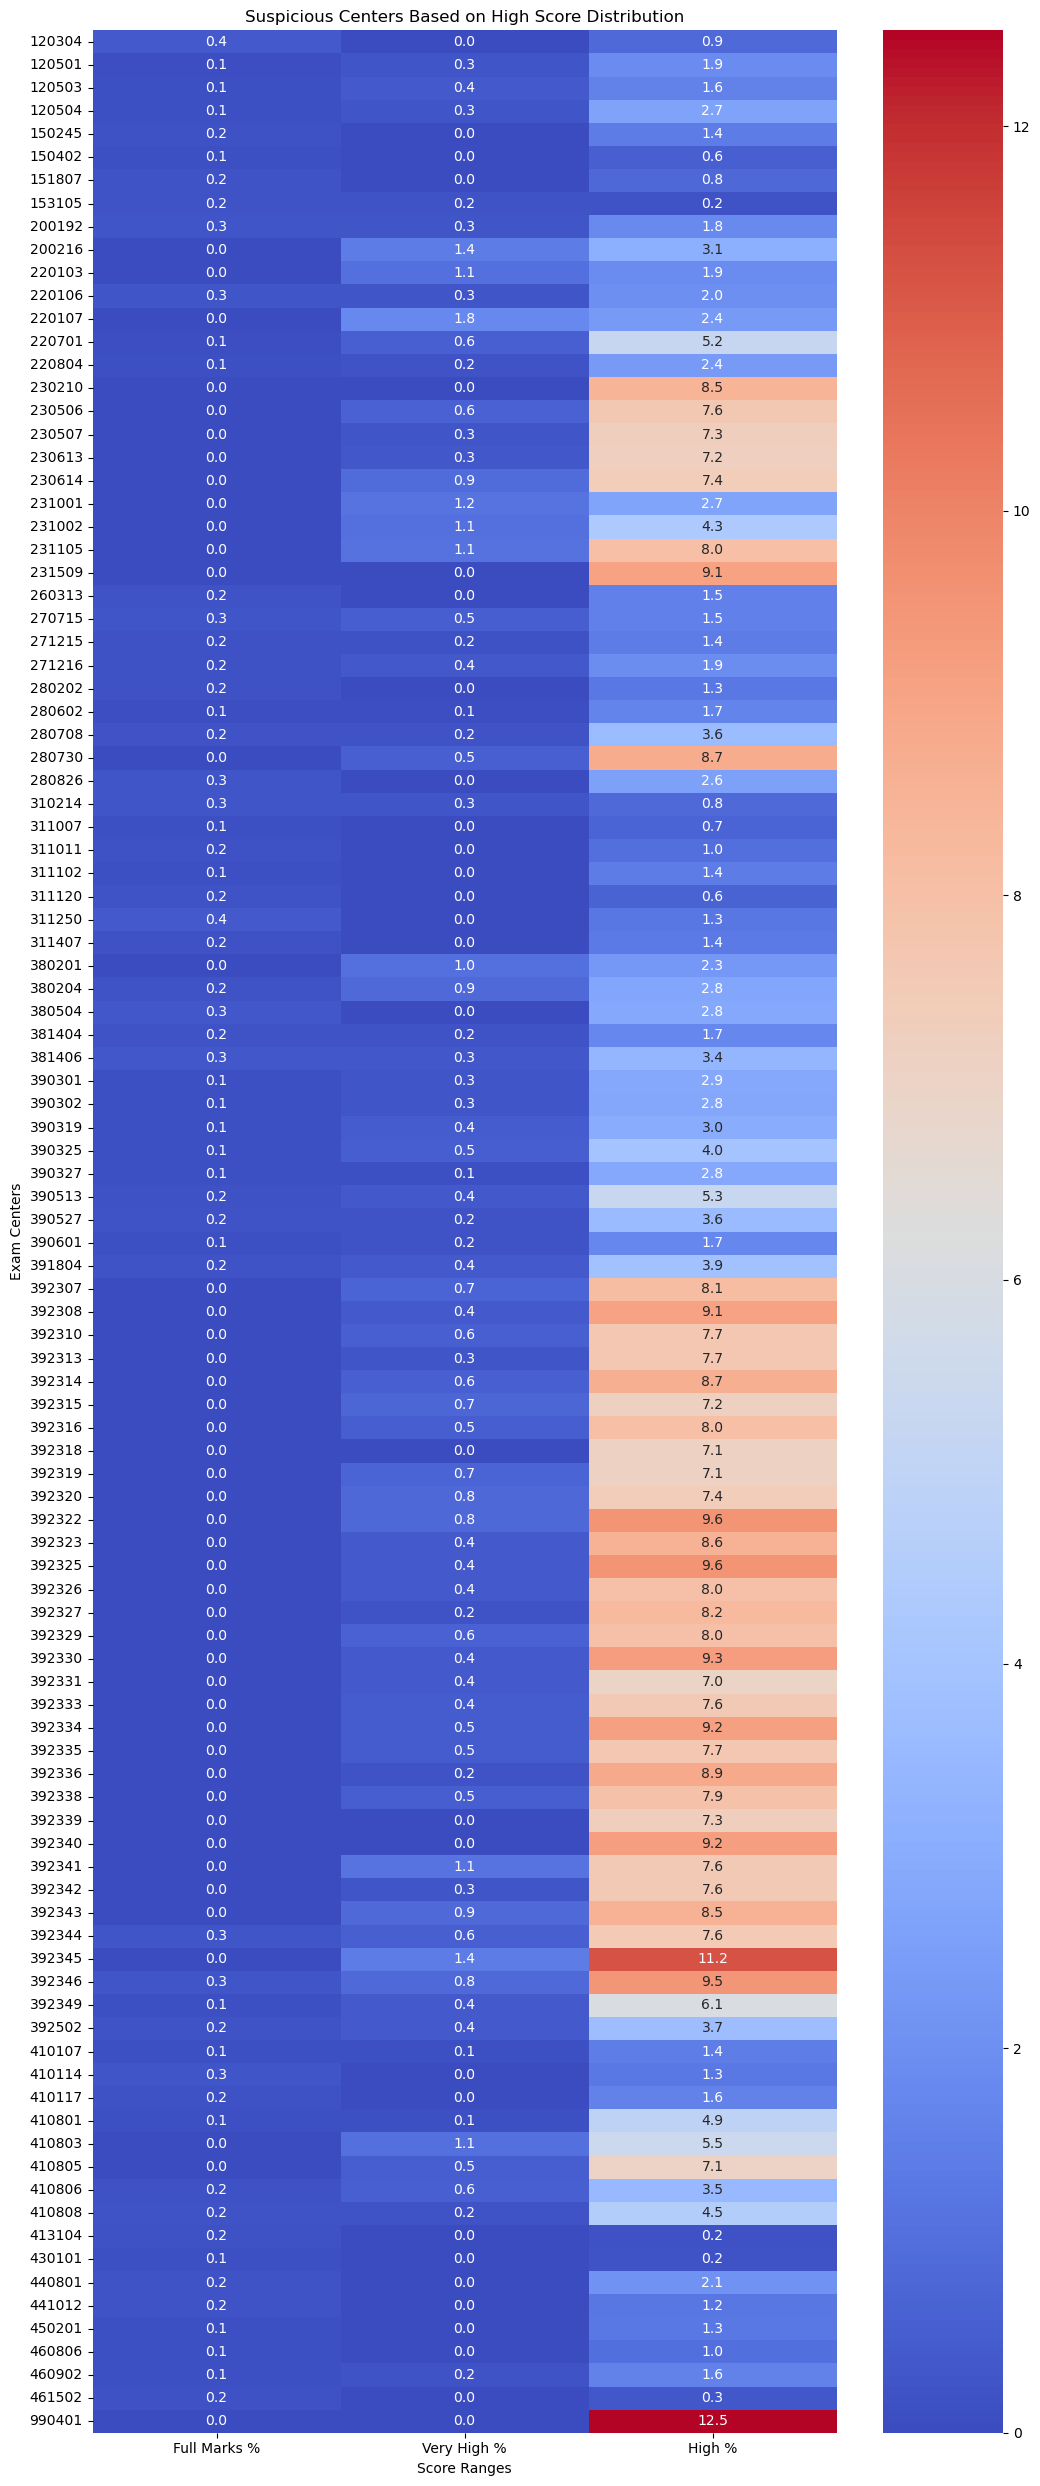

In [13]:
plt.figure(figsize=(12, len(df_suspicious_centers) * 0.3))
sns.heatmap(
    df_suspicious_centers[["Full Marks %", "Very High %", "High %"]],
    cmap="coolwarm",
    annot=True,
    fmt=".1f"
)
plt.title("Suspicious Centers Based on High Score Distribution")
plt.xlabel("Score Ranges")
plt.ylabel("Exam Centers")
plt.show()


In [6]:
import os
import pdfplumber
import re

# List of Indian states
indian_states = [
    "ANDHRA PRADESH", "ARUNACHAL PRADESH", "ASSAM", "BIHAR", "CHHATTISGARH", "GOA",
    "GUJARAT", "HARYANA", "HIMACHAL PRADESH", "JHARKHAND", "KARNATAKA", "KERALA",
    "MADHYA PRADESH", "MAHARASHTRA", "MANIPUR", "MEGHALAYA", "MIZORAM", "NAGALAND",
    "ODISHA", "PUNJAB", "RAJASTHAN", "SIKKIM", "TAMIL NADU", "TELANGANA", "TRIPURA",
    "UTTAR PRADESH", "UTTARAKHAND", "WEST BENGAL", "DELHI", "JAMMU AND KASHMIR", 
    "LADAKH", "PUDUCHERRY", "CHANDIGARH", "DAMAN AND DIU", "LAKSHADWEEP", "ANDAMAN AND NICOBAR ISLANDS"
]

# Compile regex for efficient matching
state_pattern = re.compile(r'\b(' + '|'.join(indian_states) + r')\b', re.IGNORECASE)

pdf_folder = r"D:\ML related things\NEET results analysis\neet_results_pdfs"

# Extract state names for flagged centers only
for center_code in df_suspicious_centers.index:
    pdf_file = f"{center_code}.pdf"
    file_path = os.path.join(pdf_folder, pdf_file)

    try:
        with pdfplumber.open(file_path) as pdf:
            first_page = pdf.pages[0]
            text = first_page.extract_text()

            # Match state name using predefined list
            match = state_pattern.search(text)
            if match:
                state = match.group(1).upper()  # Ensure uniform capitalization
            else:
                state = "Unknown"

            df_suspicious_centers.loc[center_code, "State"] = state

    except Exception as e:
        df_suspicious_centers.loc[center_code, "State"] = "Error"


C:\Users\NITRO\AppData\Local\Temp\ipykernel_12412\3219453483.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_suspicious_centers.loc[center_code, "State"] = state


In [9]:
df_suspicious_centers.drop("990401")

,total_students,full_marks_students,near_full_students,very_high_students,high_students,Full Marks %,Near Full %,Very High %,High %,State
Center,,,,,,,,,,
120304,229,1,0,0,2,0.436681,0.000000,0.000000,0.873362,ANDHRA PRADESH
120501,1182,1,0,3,22,0.084602,0.000000,0.253807,1.861252,ANDHRA PRADESH
120503,948,1,0,4,15,0.105485,0.000000,0.421941,1.582278,ANDHRA PRADESH
120504,713,1,0,2,19,0.140252,0.000000,0.280505,2.664797,ANDHRA PRADESH
150245,582,1,0,0,8,0.171821,0.000000,0.000000,1.374570,BIHAR
...,...,...,...,...,...,...,...,...,...,...
441012,487,1,1,0,6,0.205339,0.205339,0.000000,1.232033,UTTAR PRADESH
450201,692,1,0,0,9,0.144509,0.000000,0.000000,1.300578,UTTARAKHAND
460806,693,1,0,0,7,0.144300,0.000000,0.000000,1.010101,WEST BENGAL


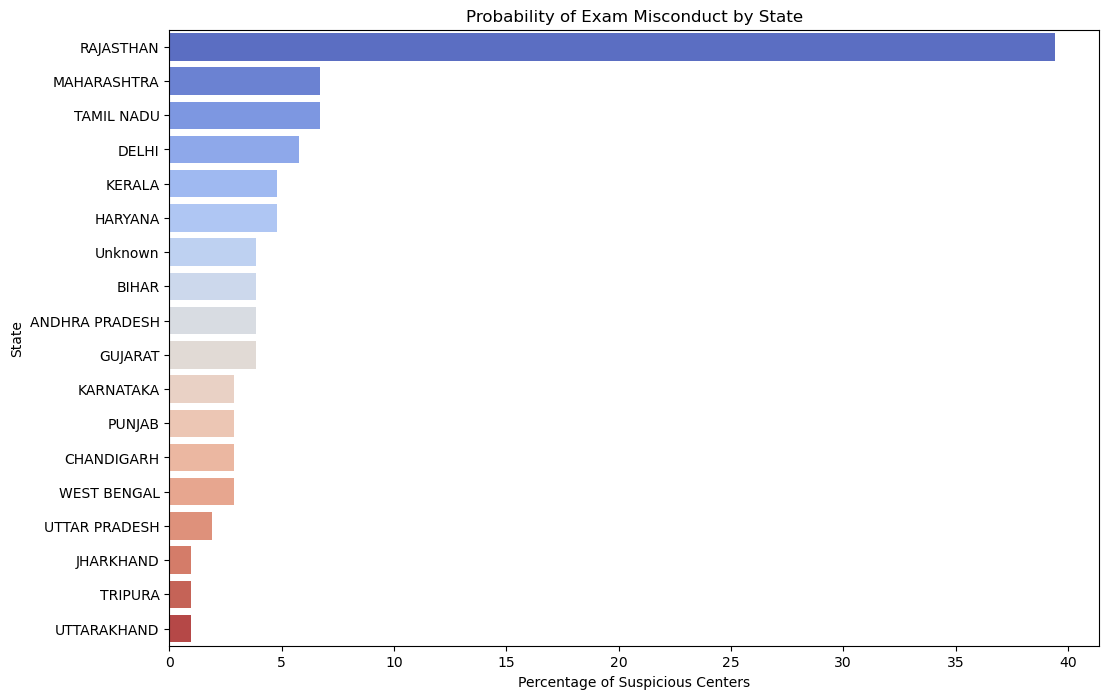

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count suspicious centers per state
state_counts = df_suspicious_centers["State"].value_counts(normalize=True) * 100  # Percentage

# Bar Chart for Misconduct Probability
plt.figure(figsize=(12, 8))
sns.barplot(x=state_counts.values, y=state_counts.index, palette="coolwarm")
plt.xlabel("Percentage of Suspicious Centers")
plt.ylabel("State")
plt.title("Probability of Exam Misconduct by State")
plt.show()
